# WIKI-FIL-CEL Scraper EDA

In [1]:
import pandas as pd
import seaborn as sns
import ast

In [2]:
df = pd.read_csv("../../output/actors.csv")

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1627 entries, 0 to 1626
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   name           1627 non-null   str  
 1   gender         1627 non-null   str  
 2   wikipedia_url  1627 non-null   str  
 3   birthdate      1507 non-null   str  
 4   image_urls     1627 non-null   str  
dtypes: str(5)
memory usage: 63.7 KB


In [4]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   name           1507 non-null   str  
 1   gender         1507 non-null   str  
 2   wikipedia_url  1507 non-null   str  
 3   birthdate      1507 non-null   str  
 4   image_urls     1507 non-null   str  
dtypes: str(5)
memory usage: 59.0 KB


In [6]:
df["image_urls"] = df["image_urls"].apply(ast.literal_eval)

In [7]:
df["image_urls_count"] = df["image_urls"].apply(len)

In [8]:
df = df[df["image_urls_count"] > 0]

<Axes: xlabel='count', ylabel='image_urls_count'>

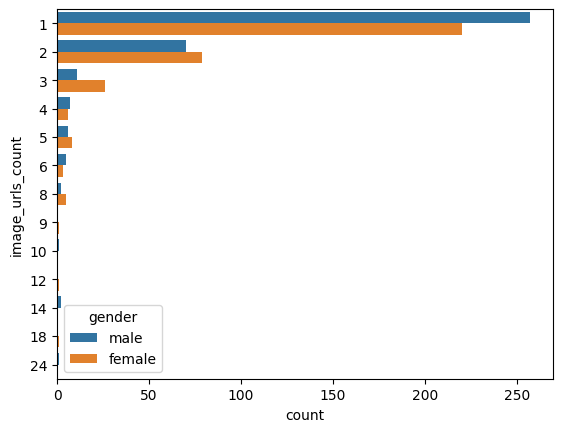

In [9]:
sns.countplot(df, y="image_urls_count", hue="gender", hue_order=["male", "female"])

In [10]:
df.head()

,name,gender,wikipedia_url,birthdate,image_urls,image_urls_count
0,AC Bonifacio,female,https://en.wikipedia.org/wiki/AC%20Bonifacio,2002-12-13,[https://upload.wikimedia.org/wikipedia/common...,1
3,AJ Perez,male,https://en.wikipedia.org/wiki/AJ%20Perez,1993-02-17,[https://upload.wikimedia.org/wikipedia/en/thu...,2
5,Aaron Agassi,male,https://en.wikipedia.org/wiki/Aaron%20Agassi,1988-03-29,[https://upload.wikimedia.org/wikipedia/en/thu...,2
6,Abel Estanislao,male,https://en.wikipedia.org/wiki/Abel%20Estanislao,1995-05-19,[https://upload.wikimedia.org/wikipedia/common...,1
7,Abra (rapper),male,https://en.wikipedia.org/wiki/Abra%20%28rapper%29,1988-12-01,[https://upload.wikimedia.org/wikipedia/common...,1


In [12]:
df_image_urls_exploded = df.drop(columns="image_urls_count").explode("image_urls").rename(columns={"image_urls": "image_url"})
df_image_urls_exploded

,name,gender,wikipedia_url,birthdate,image_url
0,AC Bonifacio,female,https://en.wikipedia.org/wiki/AC%20Bonifacio,2002-12-13,https://upload.wikimedia.org/wikipedia/commons...
3,AJ Perez,male,https://en.wikipedia.org/wiki/AJ%20Perez,1993-02-17,https://upload.wikimedia.org/wikipedia/en/thum...
3,AJ Perez,male,https://en.wikipedia.org/wiki/AJ%20Perez,1993-02-17,https://upload.wikimedia.org/wikipedia/commons...
5,Aaron Agassi,male,https://en.wikipedia.org/wiki/Aaron%20Agassi,1988-03-29,https://upload.wikimedia.org/wikipedia/en/thum...
5,Aaron Agassi,male,https://en.wikipedia.org/wiki/Aaron%20Agassi,1988-03-29,https://upload.wikimedia.org/wikipedia/en/thum...
...,...,...,...,...,...
1495,Zaldy Zshornack,male,https://en.wikipedia.org/wiki/Zaldy%20Zshornack,1937-12-30,https://upload.wikimedia.org/wikipedia/en/thum...
1499,Zeryl Lim,female,https://en.wikipedia.org/wiki/Zeryl%20Lim,2009-11-15,https://upload.wikimedia.org/wikipedia/en/8/86...
1503,Zoren Legaspi,male,https://en.wikipedia.org/wiki/Zoren%20Legaspi,1972-01-30,https://upload.wikimedia.org/wikipedia/commons...
1504,Zsa Zsa Padilla,female,https://en.wikipedia.org/wiki/Zsa%20Zsa%20Padilla,1964-05-28,https://upload.wikimedia.org/wikipedia/commons...


In [16]:
df_image_urls_exploded.reset_index(drop=True).to_csv("../../output/actors_image_url.csv", index=False)